In [1]:
!git clone https://github.com/hrishavkmr/track

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Counting objects: 100% (12163/12163), done.
remote: Compressing objects: 100% (12163/12163), done.
remote: Total 12163 (delta 0), reused 12163 (delta 0), pack-reused 0
Receiving objects: 100% (12163/12163), 156.98 MiB | 39.82 MiB/s, done.
Checking out files: 100% (12160/12160), done.


In [2]:
!git clone https://github.com/aleju/imgaug.git

Cloning into 'imgaug'...
remote: Enumerating objects: 559, done.
remote: Counting objects: 100% (559/559), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 8437 (delta 416), reused 459 (delta 350), pack-reused 7878
Receiving objects: 100% (8437/8437), 22.82 MiB | 33.76 MiB/s, done.
Resolving deltas: 100% (6022/6022), done.


In [3]:
!ls track

driving_log.csv  IMG


In [4]:
!python imgaug/setup.py install

running install
running bdist_egg
running egg_info
creating imgaug.egg-info
writing imgaug.egg-info/PKG-INFO
writing dependency_links to imgaug.egg-info/dependency_links.txt
writing requirements to imgaug.egg-info/requires.txt
writing top-level names to imgaug.egg-info/top_level.txt
writing manifest file 'imgaug.egg-info/SOURCES.txt'
reading manifest file 'imgaug.egg-info/SOURCES.txt'
writing manifest file 'imgaug.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying imgaug.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying imgaug.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying imgaug.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying imgaug.egg-info/requires.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying imgaug.egg-info/top_level.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from imgaug import augmenters as aug
import pandas as pd
import ntpath
import random
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [6]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
datadir = 'track'
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.1,0.2,0.649786
1,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [7]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.1,0.2,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


(array([3.50e+01, 6.00e+00, 6.00e+00, 6.00e+00, 1.30e+01, 8.00e+00,
        2.40e+01, 2.20e+01, 5.30e+01, 1.31e+02, 9.90e+01, 1.58e+02,
        2.99e+03, 1.37e+02, 8.60e+01, 1.26e+02, 5.40e+01, 2.20e+01,
        1.90e+01, 2.00e+00, 9.00e+00, 4.00e+00, 4.00e+00, 6.00e+00,
        3.30e+01]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]),
 <a list of 25 Patch objects>)

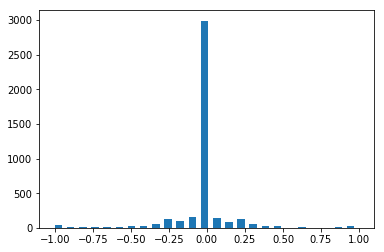

In [8]:
#which steering angles are more frequent
num_bins = 25
hist_, bins = np.histogram(data['steering'], num_bins)
plt.hist(data['steering'],bins,width = 0.05)
# plt.show()

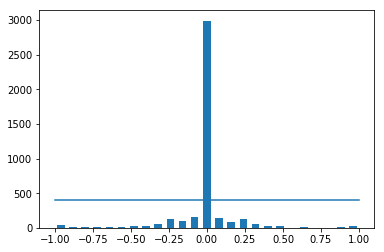

In [9]:
#as can be seen the model will become biased towards 0 angle,so we reject all samples above certain threshold value

# print(bins)
center = (bins[:-1] + bins[1:]) *0.5 
plt.bar(center,hist_,width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (400,400)) # restricting values to 400

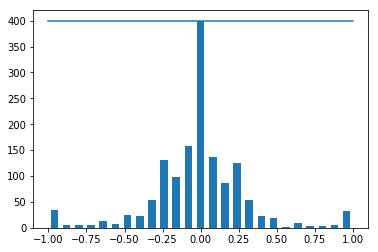

In [10]:
remove_list = []
for i in range(num_bins):
  li = []
  for j in range(len(data['steering'])):
    if(data['steering'][j] >= bins[i] and  data['steering'][j] <= bins[i+1]):
      li.append(j)
      
  li = shuffle(li)
  li = li[400:]
  remove_list.extend(li)
  
  
data.drop(data.index[remove_list],inplace = True)
hist_, bins = np.histogram(data['steering'], num_bins)
# print(bins)
center = (bins[:-1] + bins[1:]) *0.5 
plt.bar(center,hist_,width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (400,400)) # restricting values to 400

In [0]:
def load_img_steering(dir,data):
  image_paths = []
  steering_angle = []
  for i in range(len(data)):
    single_data_point = data.iloc[i]
    center,left,right = single_data_point['center'],single_data_point['left'],single_data_point['right']
    image_paths.append(os.path.join(dir,center));
    steering_angle.append(single_data_point['steering'])
  image_paths = np.asarray(image_paths)
  steering_angle = np.asarray(steering_angle)
  return image_paths,steering_angle

image_paths,steering_angle = load_img_steering('track' + '/IMG',data)

In [0]:
x_train,x_val,y_train,y_val = train_test_split(image_paths,steering_angle,test_size = 0.2,random_state = 6)

In [13]:
print("Training_samples: ", len(x_train))
print("Validating_samples: ", len(x_val))

Training_samples:  1170
Validating_samples:  293


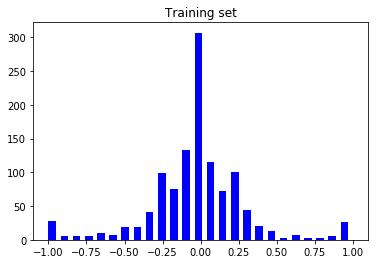

In [14]:
plt.hist(y_train,bins,width = 0.05, color = 'blue')
plt.title('Training set')
plt.show()

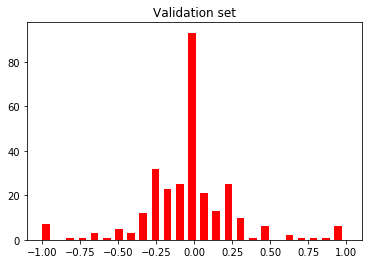

In [15]:
plt.hist(y_val,bins,width = 0.05,color = 'red')
plt.title('Validation set')
plt.show()

In [0]:
def zoom(img):
  zoom = aug.Affine(scale=(1,1.3))
  return zoom.augment_image(img)

Text(0.5, 1.0, 'zoomed image')

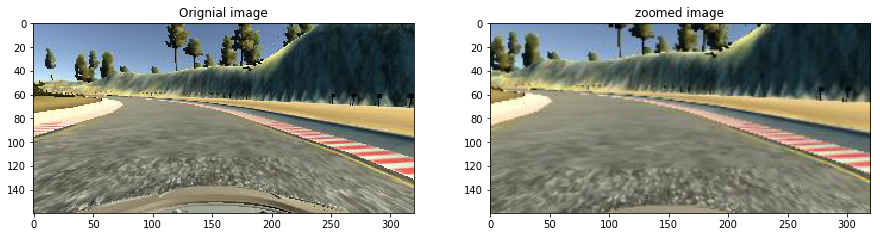

In [17]:
org_img = mpimg.imread(image_paths[0])
zoom_img = zoom(org_img)
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].imshow(org_img)
axes[0].set_title('Orignial image')

axes[1].imshow(zoom_img)
axes[1].set_title('zoomed image')

In [0]:
def shift(img):
  shift = aug.Affine(translate_percent = {"x" : (-0.1,0.1) ,"y": (-0.1, 0.1)})
  return shift.augment_image(img)

Text(0.5, 1.0, 'shifted image')

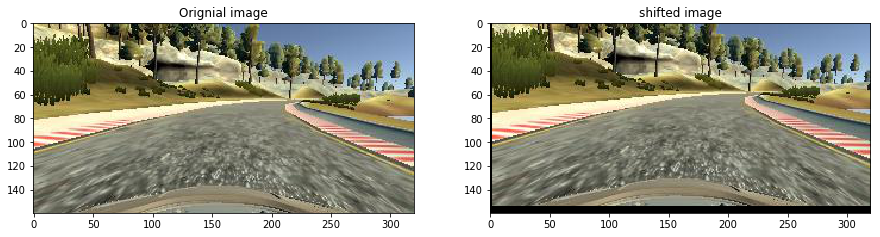

In [19]:
org_img = mpimg.imread(image_paths[random.randint(0,1010)])
shifted_img = shift(org_img)
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].imshow(org_img)
axes[0].set_title('Orignial image')

axes[1].imshow(shifted_img)
axes[1].set_title('shifted image')

In [0]:
def img_brightness(img):
  brightness = aug.Multiply((0.2,0.3))
  return brightness.augment_image(img) 

Text(0.5, 1.0, 'Brightness altered image')

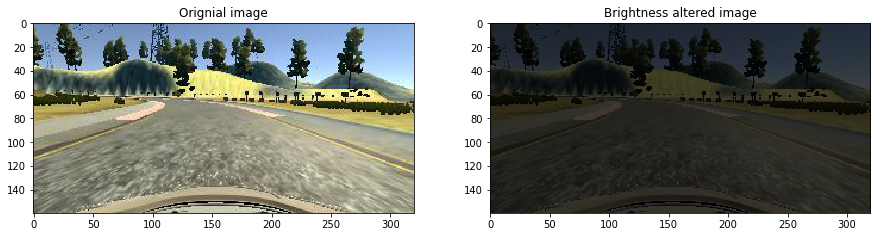

In [21]:
org_img = mpimg.imread(image_paths[random.randint(0,1010)])
brightness = img_brightness(org_img)
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].imshow(org_img)
axes[0].set_title('Orignial image')

axes[1].imshow(brightness)
axes[1].set_title('Brightness altered image')

In [0]:
def random_flip(img,angle):
  img = cv2.flip(img, 1)
  angle = -angle
  return img,angle

Text(0.5, 1.0, '0.3')

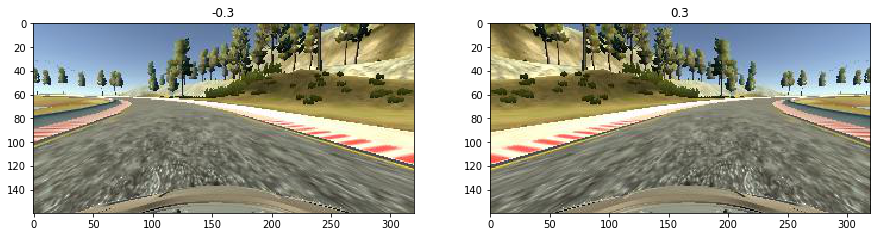

In [23]:
index = random.randint(0,1010)
flip,angle = random_flip(mpimg.imread(image_paths[index]),steering_angle[index])
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].imshow(mpimg.imread(image_paths[index]))

axes[0].set_title(steering_angle[index])

axes[1].imshow(flip)
axes[1].set_title(angle)

In [0]:
def augment(img,angle):
  img = mpimg.imread(img)
  if (np.random.rand() < 0.5):
    img = zoom(img)
  if (np.random.rand() < 0.5):
    img = shift(img)
  if (np.random.rand() < 0.5):
    img = img_brightness(img)
  if (np.random.rand() < 0.5):
    img,angle = random_flip(img,angle)
  return img,angle

Text(0.5, 1.0, 'augment image')

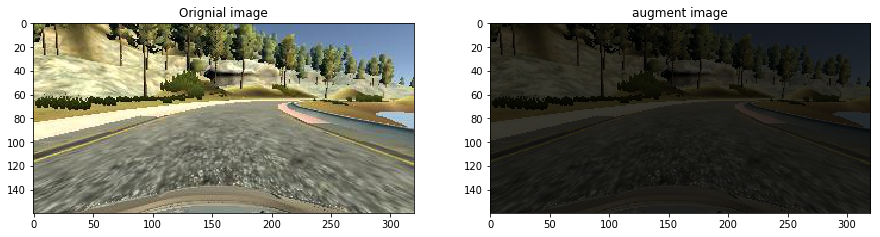

In [25]:
index = random.randint(0,1010)
brightness,angle = augment(image_paths[index],steering_angle[index])
fig,axes = plt.subplots(1,2,figsize=(15,10))

axes[0].imshow(mpimg.imread(image_paths[index]))
axes[0].set_title('Orignial image')

axes[1].imshow(brightness)
axes[1].set_title('augment image')

In [0]:
#we convert RGB to YUV format (from nvidia research paper)
def image_preprocess(img):
  img = img[60:135,:,:] #1 preprocessing
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) #2 preprocessing
  img = cv2.GaussianBlur(img, (3,3), 0) #3 preprocessing
  img = cv2.resize(img, (200,66)) #architecture
  img = img/255 #normalizing image
  return img

In [27]:
x_train[0]

'track/IMG/center_2018_07_16_17_13_34_535.jpg'

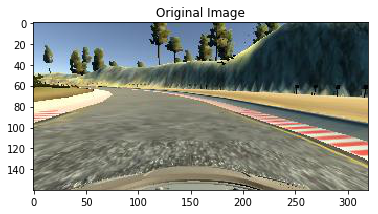

In [28]:
image_path = image_paths[0]
original_image = mpimg.imread(image_path)
modified_image = image_preprocess(original_image)

plt.imshow(original_image)
plt.title('Original Image')
plt.show()

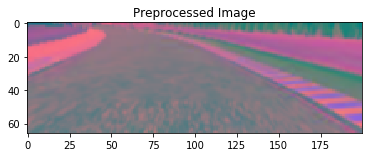

In [29]:
plt.imshow(modified_image)
plt.title('Preprocessed Image')
plt.show()

In [30]:
modified_image.shape

(66, 200, 3)

In [0]:
def batch_generator(image_paths,steering_angle, batch_size,istraining):
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = np.random.randint(0,len(image_paths) -1)
      if(istraining):
        img, steering = augment(image_paths[random_index],steering_angle[random_index])
      else:
        img, steering = mpimg.imread(image_paths[random_index]),steering_angle[random_index]
        
      img = image_preprocess(img)
      batch_img.append(img)
      batch_steering.append(steering)
   
    yield(np.asarray(batch_img),np.asarray(batch_steering))
  

In [0]:
x_gen, y_gen = next(batch_generator(x_train,y_train,1,1))
# x_val_gen, y_val_gen = next(batch_generator(x_val,y_val,1,0))

Text(0.5, 1.0, 'Augmented image')

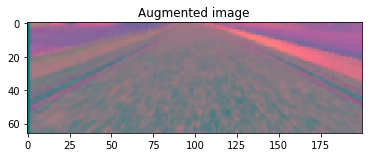

In [33]:
plt.imshow(x_gen[0])
plt.title('Augmented image')


In [0]:
def preprocessing2(x):
  img = mpimg.imread(x)
  return image_preprocess(img)

x_val  = np.array(list(map(preprocessing2,x_val)))

In [0]:
def get_model():
  model = Sequential()
  model.add(Conv2D(24, (5,5) ,strides = (2,2) ,input_shape = (66,200,3), activation = 'elu'))
  model.add(Conv2D(36, (5,5) ,strides = (2,2) , activation = 'elu'))
  model.add(Conv2D(48, (5,5) ,strides = (2,2) , activation = 'elu'))
  model.add(Conv2D(64, (3,3) , activation = 'elu'))
  model.add(Conv2D(64, (3,3) , activation = 'elu')) 
#   model.add(Dropout(0.5)) 
  model.add(Flatten())
  model.add(Dense(100,activation = 'elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(50,activation = 'elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(10,activation = 'elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(1))
  
  model.compile(loss = 'mse', optimizer = Adam(lr = 0.0001))
#   print(model.summary)
  return model
  

In [36]:
model = get_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dens

In [37]:
#  history = model.fit(x_train,y_train,epochs = 30, validation_data = (x_val,y_val), batch_size = 100, verbose=1, shuffle = 1 )
history = model.fit_generator(batch_generator(x_train, y_train, 100,1), steps_per_epoch = 300, epochs = 15,
                              validation_data = (x_val,y_val), shuffle = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
300/300 [==============================] - 102s 341ms/step - loss: 0.0841 - val_loss: 0.0587
Epoch 2/15
300/300 [==============================] - 95s 317ms/step - loss: 0.0634 - val_loss: 0.0553
Epoch 3/15
300/300 [==============================] - 94s 315ms/step - loss: 0.0578 - val_loss: 0.0572
Epoch 4/15
300/300 [==============================] - 96s 319ms/step - loss: 0.0552 - val_loss: 0.0476
Epoch 5/15
300/300 [==============================] - 95s 316ms/step - loss: 0.0519 - val_loss: 0.0459
Epoch 6/15
300/300 [==============================] - 95s 317ms/step - loss: 0.0467 - val_loss: 0.0402
Epoch 7/15
300/300 [==============================] - 95s 317ms/step - loss: 0.0438 - val_loss: 0.0449
Epoch 8/15
300/300 [==============================] - 96s 318ms/step - loss: 0.0410 - val_loss: 0.0380
Epoch 9/15
300/300 [==============================] - 95s 315ms/step - loss: 0.0389 - val_loss: 0.0453
Epoch 10/15
300/300 [===

Text(0.5, 0, 'Epoch')

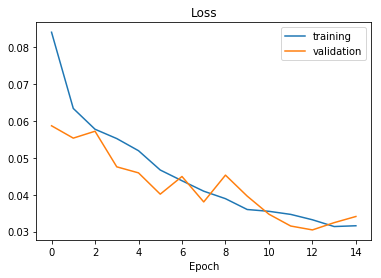

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
model.save('model.h5')